<a href="https://colab.research.google.com/github/Cavera360JM/ONIA/blob/main/Onia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatísticas Descritivas:
                 id         col_0         col_1         col_2         col_3  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean    7492.725048     34.041646      3.008547      2.270856     12.809551   
std     4347.394049      8.428862      0.789293      0.555685      2.809632   
min        0.000000      2.334047      0.000000      0.000000      2.291309   
25%     3706.250000     28.314237      2.473870      1.908040     10.929376   
50%     7500.000000     33.597613      2.995180      2.235584     12.876576   
75%    11293.250000     39.444095      3.548535      2.623687     14.686464   
max    14999.000000     71.608174      6.333788      4.697276     24.071470   

              col_4         col_5         col_6         col_7         col_8  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      25.362808      7.622088      4.929185      5.845511      3.899460   
std        5.808446      

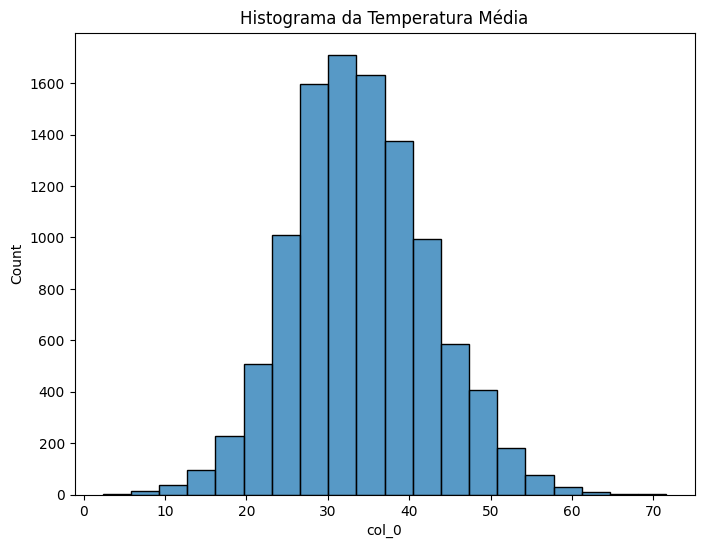

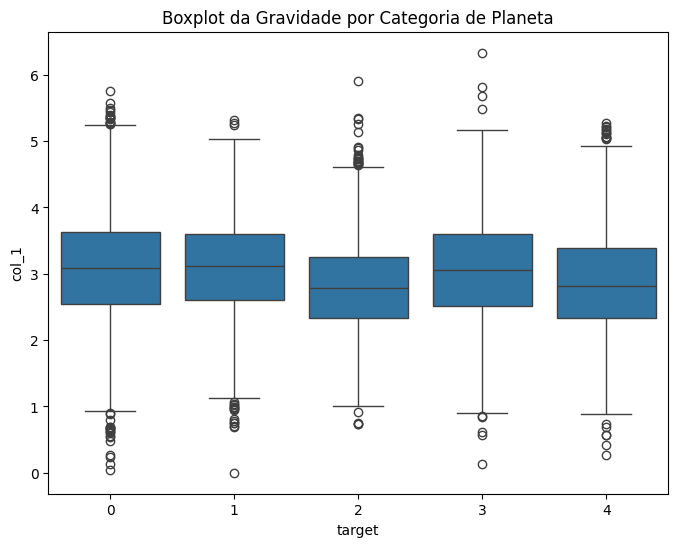

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Acurácia média (F1-score): 0.5495770756697381
Arquivo de envio 'submission.csv' criado com sucesso!
F1-score no conjunto de treino: 0.8196489775266214
Instâncias classificadas incorretamente:
          id      col_0     col_1     col_2      col_3      col_4      col_5  \
13      5913  45.156231  2.834723  1.654739  16.598296  31.802927  10.693380   
20      8542  23.903423  3.258914  1.588991  17.730389  32.490177  10.202151   
21      5679  39.982160  2.558656  2.589103  11.821856  22.036238   6.370611   
22      8821  33.556158  3.512307  2.130822  16.285596  26.826542  10.743183   
48      4522  37.561598  3.029389  2.449853   9.374217  23.491789   5.128460   
...      ...        ...       ...       ...        ...        ...        ...   
10455   7513  30.732108  3.312452  2.004354  13.197514  28.148487   8.154787   
10456  10709  51.928054  2.451099  1.890230  13.79

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados de treinamento e teste
train_data = pd.read_csv("treino.csv")
test_data = pd.read_csv("teste.csv")

# 2. Preparar os dados
features = [f"col_{i}" for i in range(13)]
X_train = train_data[features]
y_train = train_data["target"]
X_test = test_data[features]

# 3. Análise Exploratória de Dados (EDA)
# 3.1. Estatísticas Descritivas
print("Estatísticas Descritivas:")
print(train_data.describe())

# 3.2. Visualizações
# Exemplo: Histograma da coluna 'TempMédia'
plt.figure(figsize=(8, 6))
sns.histplot(train_data["col_0"], bins=20)
plt.title("Histograma da Temperatura Média")
plt.show()

# Exemplo: Boxplot da relação entre 'Gravidade' e 'target'
plt.figure(figsize=(8, 6))
sns.boxplot(x="target", y="col_1", data=train_data)
plt.title("Boxplot da Gravidade por Categoria de Planeta")
plt.show()

# 4. Ajuste de Hiperparâmetros com GridSearchCV
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# 5. Avaliação do Modelo com Validação Cruzada (usando F1-score)
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="f1_macro")
print(f"Acurácia média (F1-score): {scores.mean()}")

# 6. Fazer previsões no conjunto de teste
predictions = best_model.predict(X_test)

# 7. Criar o arquivo de envio
submission = pd.DataFrame({"id": test_data["id"], "target": predictions})
submission.to_csv("submission.csv", index=False)

print("Arquivo de envio 'submission.csv' criado com sucesso!")

# 8. Avaliação do modelo no conjunto de teste para o relatório

f1 = f1_score(y_train, best_model.predict(X_train), average='macro')

print(f"F1-score no conjunto de treino: {f1}")

# 9. Análise de Erros (opcional)
# Identificar instâncias classificadas incorretamente
train_predictions = best_model.predict(X_train)
errors = train_data[train_predictions != y_train]
print("Instâncias classificadas incorretamente:")
print(errors)